In [1]:
import pandas as pd
import numpy as np

from sklearn.datasets import load_digits
from sklearn.model_selection import GridSearchCV

In [2]:
digits = load_digits()
dir(digits)

['DESCR', 'data', 'feature_names', 'frame', 'images', 'target', 'target_names']

In [5]:
df_digits = pd.DataFrame(digits.data,columns = digits.feature_names)
df_digits['target'] = digits.target
df_digits.head()

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7,target
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0,0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0,1
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0,2
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0,3
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0,4


In [30]:
from sklearn.model_selection import train_test_split

x = df_digits.drop('target',axis='columns')
y = df_digits['target']

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

CHOOSING THE BEST MODEL FO SOLVING THIS PROBLEM

In [35]:
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier

model_params = {
    'svm' : {
        'model' : SVC(),
        'params' : {
            'C' : [1,10,20,50,100],
            'gamma' : ['auto','scale'],
            'kernel' : ['rbf','linear']
        }
    },
    'random_forest' : {
        'model' : RandomForestClassifier(),
        'params' : {
            'n_estimators' : [1,5,10,20,40,50],
            'max_depth' : [4,5,10,20]
        }
    },
    'logistic_reg' : {
        'model' : LogisticRegression(solver='liblinear',multi_class='auto'),
        'params' : {
            'max_iter' : [100,200,500,1000],
            'C' : [1,5,10,20]
        }
    },
    'gaussian' : {
        'model' : GaussianNB(),
        'params' : {
        }
    },
    'mult' : {
        'model' : MultinomialNB(),
        'params' : {
        }
    },
     'des_tree' : {
        'model' : DecisionTreeClassifier(),
        'params' : {
            'max_depth' : [4,5,10,20]
        }
    }
}

In [36]:
scores = []

for model_name, mp in model_params.items():
    clf = GridSearchCV(mp['model'],mp['params'],cv=5,return_train_score=False)
    clf.fit(x_train,y_train)
    scores.append({
        'model' : model_name,
        'best_score' : clf.best_score_,
        'best_params' : clf.best_params_
    })
    
df = pd.DataFrame(scores,columns=['model','best_score','best_params'])
df

,model,best_score,best_params
0,svm,0.989557,"{'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}"
1,random_forest,0.975641,"{'max_depth': 10, 'n_estimators': 40}"
2,logistic_reg,0.964516,"{'C': 1, 'max_iter': 100}"
3,gaussian,0.838540,{}
4,mult,0.890048,{}
5,des_tree,0.853835,{'max_depth': 10}


ACCORDING TO DATAFRAME ABOVE WE MUST USE SVM MODEL WITH THE SPECIFIED PARAMETRS

In [40]:
svm = SVC(kernel='rbf',C=10,gamma='scale')
svm.fit(x_train,y_train)
y_pred = svm.predict(x_test)

In [41]:
output = pd.DataFrame(y_test)
output = output.reset_index().drop('index',axis='columns')
output['predict'] = y_pred
output.head()

,target,predict
0,9,9
1,3,3
2,5,5
3,7,7
4,5,5


Text(95.72222222222221, 0.5, 'Truth')

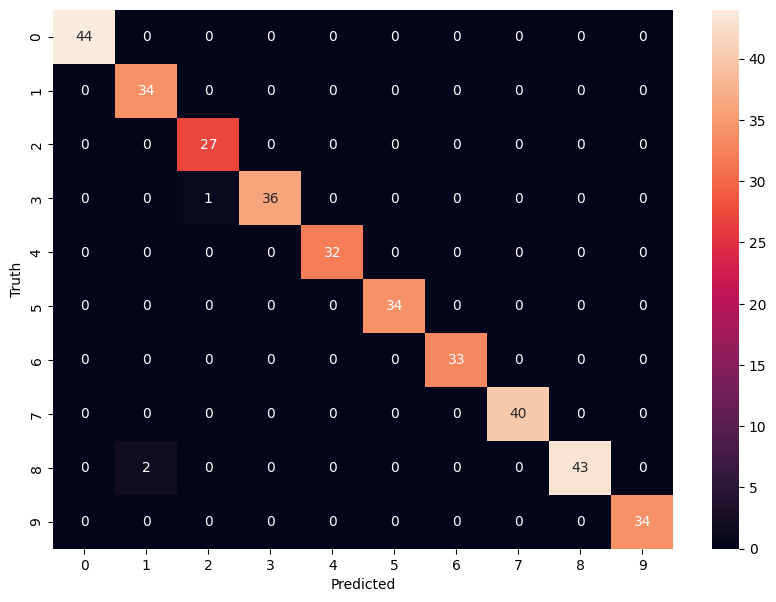

In [42]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test,y_pred)
plt.figure(figsize=(10,7))
sns.heatmap(cm,annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')